In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

In [ ]:
happy = pd.read_csv('happy.csv')
happy.head(10)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.7,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.6,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.4,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.3,0.908,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784


In [ ]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [ ]:
region_happy = happy[['Ladder score', 'Regional indicator']].groupby('Regional indicator').median().reset_index().sort_values(by='Ladder score', ascending=False)
region_happy

,Regional indicator,Ladder score
5,North America and ANZ,7.1430
9,Western Europe,7.0850
0,Central and Eastern Europe,6.0780
3,Latin America and Caribbean,5.9920
2,East Asia,5.7610
1,Commonwealth of Independent States,5.4715
7,Southeast Asia,5.3840
6,South Asia,4.9340
4,Middle East and North Africa,4.8870
8,Sub-Saharan Africa,4.6160


Text(0.5, 1.0, 'Уровень жизни в зависимиости от региона')

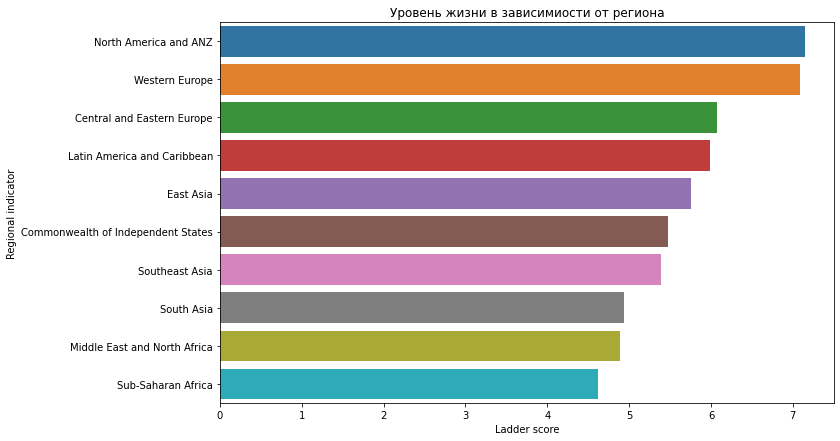

In [ ]:
sns.barplot(x=region_happy['Ladder score'],
            y=region_happy['Regional indicator']).set_title('Уровень жизни в зависимиости от региона')

Вывод по визуализации:

Первоначальная оценка уровни жизни по регионам показала, что медианный уровень жизни в Северной Америке и Европейских странах на порядок выше чем, допустим в Африканских странах.
Латинская Америка и Азия находится где-то по середине.


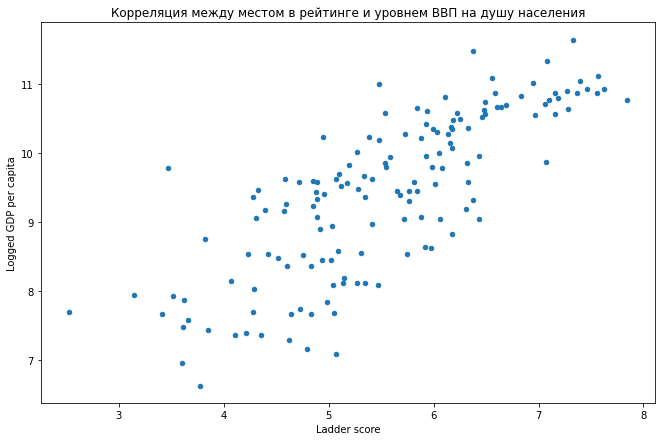

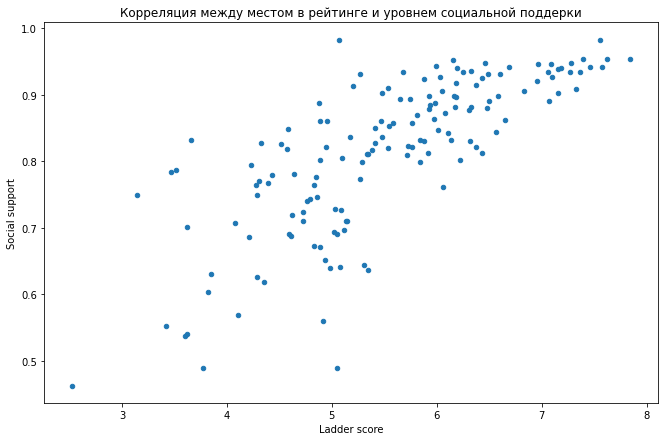

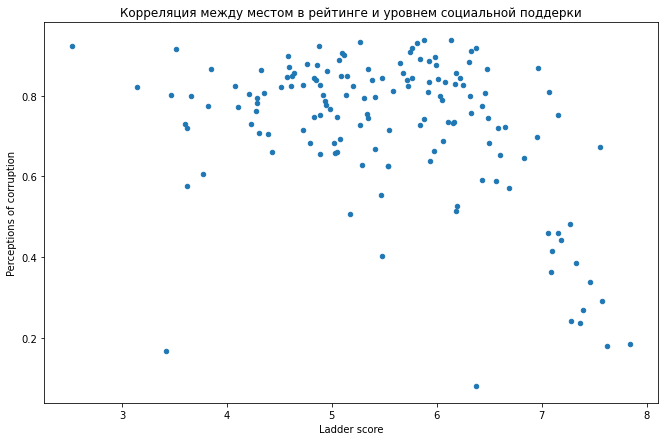

In [ ]:
happy.plot(kind='scatter',
           x='Ladder score',
           y='Logged GDP per capita',
           title='Корреляция между местом в рейтинге и уровнем ВВП на душу населения')

happy.plot(kind='scatter',
           x='Ladder score',
           y='Social support',
           title='Корреляция между местом в рейтинге и уровнем социальной поддерки')

happy.plot(kind='scatter',
           x='Ladder score',
           y='Perceptions of corruption',
           title='Корреляция между местом в рейтинге и уровнем социальной поддерки')

Вывод по визуализации:

Очевидно, что чем выше ВВП и меры социальной поддержки, тем уровень "счастья" населения выше. 

И обратная зависимость к уровню коррупции. Чем выше восприятие коррупции тем ниже уровень "счастья" насаления.

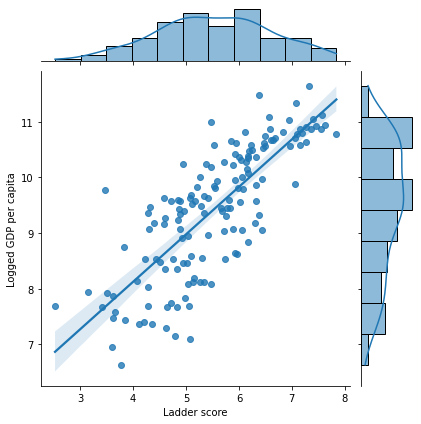

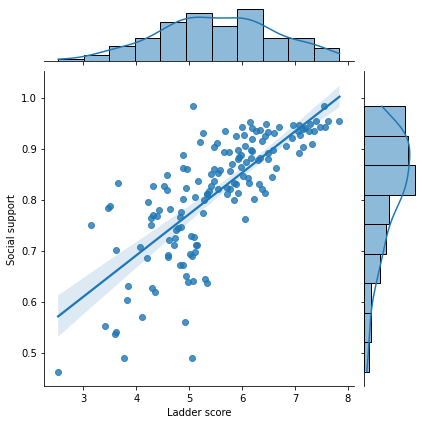

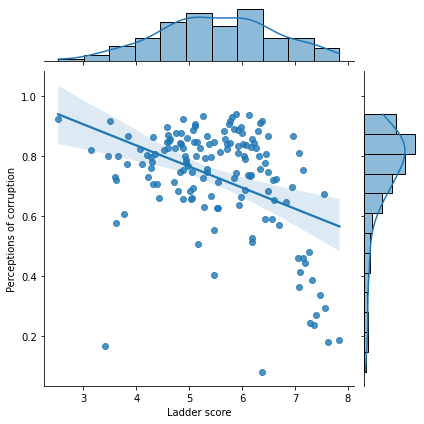

In [ ]:
# Аналогичная визуализация с результатами корреляции ВВП, меры социальной поддержки и коррупции к уровню жизни

sns.jointplot(x='Ladder score', y='Logged GDP per capita', data=happy, kind='reg')
sns.jointplot(x='Ladder score', y='Social support', data=happy, kind='reg')
sns.jointplot(x='Ladder score', y='Perceptions of corruption', data=happy, kind='reg')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09667f0b10>,
      dtype=object)

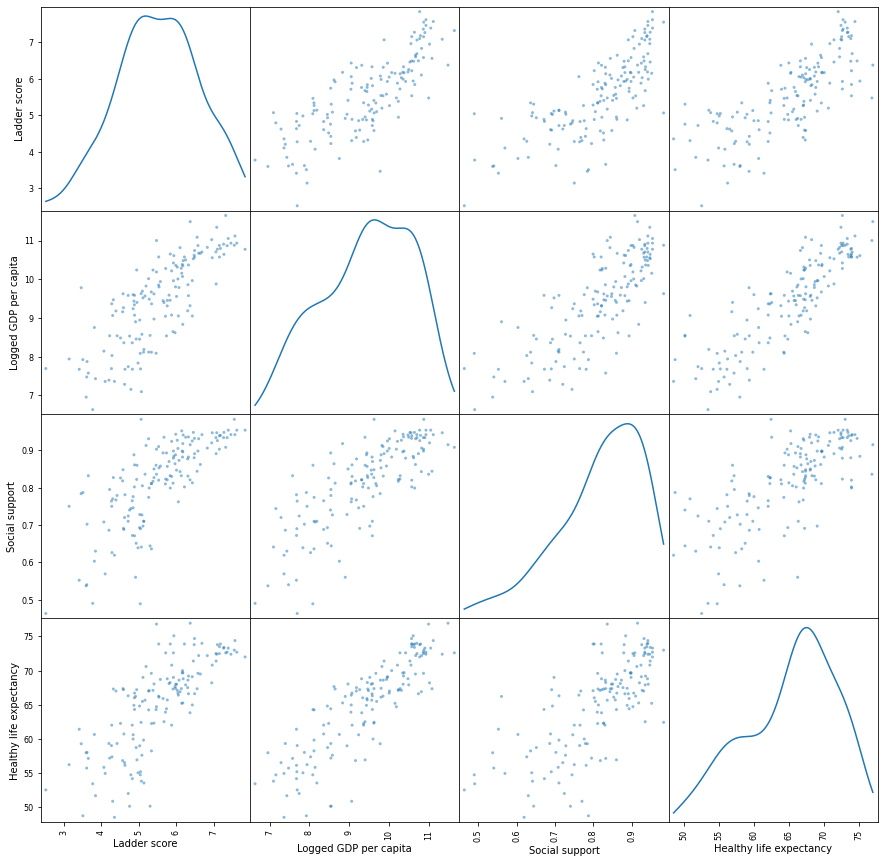

In [ ]:
pd.plotting.scatter_matrix(happy[['Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy']],
                           diagonal='kde',
                           figsize=[15, 15],
                           marker='.'
                           )

Выводы по визуализации:

Прослеживается четкая корреляция уровня счастья к ВВП, социальной помощи и продолжительности жизни.

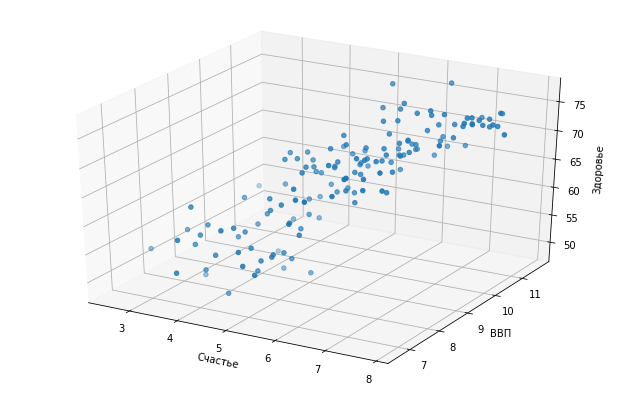

In [ ]:
# Попробовал построить 3д фигуру зависимости счестья, ВВП и здоровья

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = happy['Ladder score']
y = happy['Logged GDP per capita']
z = happy['Healthy life expectancy']

ax.set_xlabel('Счастье')
ax.set_ylabel('ВВП')
ax.set_zlabel('Здоровье')

ax.scatter(x, y, z)

In [ ]:
# Зависимость уровня счастья от региона

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

data = []

for item in happy['Regional indicator'].unique():
  data.append(
      go.Box(y=happy[happy['Regional indicator']==item]['Ladder score'],
             name=item)
  )

iplot(data, show_link=False)

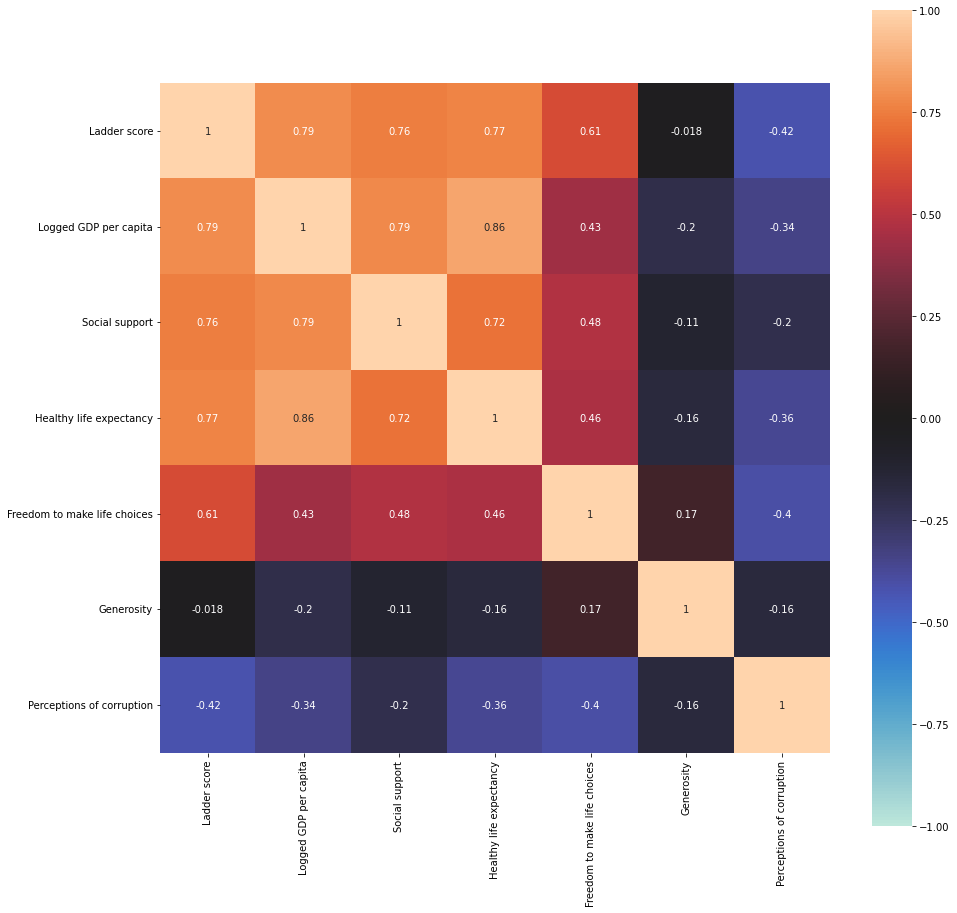

In [ ]:
heatmap=plt.figure(figsize=(15,15))
sns.heatmap(happy[['Ladder score',	'Logged GDP per capita',	'Social support',	'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',	'Perceptions of corruption']].corr(), annot=True, vmin=-1, vmax=1, center= 0, square=True)

На тепловой карте вывел корреляцию показателей:

Индекса счастья

ВВП

Социальной поддержки

Здоровья

Свободы выбора

Щедрости

Возприятия коррупции